# Cohort Analysis between Online vs Offline Customers

## Dataset:
<a href="https://www.kaggle.com/archit9406/customer-transaction-dataset">Customer_transaction_dataset</a>

## Objective:
Finding the percentage of active customers compared to the total number of customers in online and offline store after each month

In [1]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
#Check missing value

print(df.isnull().values.sum())
# Replace the ' 's with NaN
transaction_df = df.replace(" ",np.NaN)




1542


## Handling missing value

In [4]:
#Handling missing value with mean
print(df.dtypes)
print(df.isna().sum())

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col]=df[col].fillna(df[col].mean())
        
print(df.isna().sum())

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64
transaction_id          

## Split the Data

In this analysis, I will split the data into two types which are online and offline customers. The objective is I want to analyze the retention between offline and online customers.

In [5]:
online = df[df['online_order']==1]
offline = df[df['online_order']==0]

print(pd.unique(online['online_order']))
print(pd.unique(offline['online_order']))

print(online.shape)
print(offline.shape)

[1.]
[0.]
(9829, 13)
(9811, 13)


## Assign acquisition offset monthly cohort

In [6]:
# Define a function that will parse the date
def get_month(x): return dt.datetime(x.year, x.month,1) 
# Create transaction_date column based on month and store in TransactionMonth
online['TransactionMonth'] = online['transaction_date'].apply(get_month) 
offline['TransactionMonth'] = offline['transaction_date'].apply(get_month) 

# Grouping by customer_id and select the TransactionMonth value
group_online = online.groupby('customer_id')['TransactionMonth'] 
group_offline = offline.groupby('customer_id')['TransactionMonth'] 


# Assigning a minimum TransactionMonth value to the dataset
online['CohortMonth'] = group_online.transform('min')
offline['CohortMonth'] = group_offline.transform('min')

print(online.head())
print(offline.head())


   transaction_id  product_id  customer_id transaction_date  online_order  \
1               2           3         3120       2017-05-21           1.0   
4               5          78          787       2017-10-01           1.0   
5               6          25         2339       2017-03-08           1.0   
6               7          22         1542       2017-04-21           1.0   
9              10          12         3262       2017-08-30           1.0   

  order_status           brand product_line product_class product_size  \
1     Approved   Trek Bicycles     Standard        medium        large   
4     Approved  Giant Bicycles     Standard        medium        large   
5     Approved  Giant Bicycles         Road        medium       medium   
6     Approved        WeareA2B     Standard        medium       medium   
9     Approved        WeareA2B     Standard        medium       medium   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
1     2091.47     

/var/folders/6x/tjtz85yd37n5sb4nwqmv5wc40000gn/T/ipykernel_3881/3511057928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online['TransactionMonth'] = online['transaction_date'].apply(get_month)
/var/folders/6x/tjtz85yd37n5sb4nwqmv5wc40000gn/T/ipykernel_3881/3511057928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline['TransactionMonth'] = offline['transaction_date'].apply(get_month)
/var/folders/6x/tjtz85yd37n5sb4nwqmv5wc40000gn/T/ipykernel_3881/3511057928.py:13: SettingWithCopyWarning: 
A v

## Calculate time offset in days

In [7]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [8]:
# Get the integers for date parts from the `transactionDay` column
transaction_year, transaction_month = get_date_int(online, 'TransactionMonth')
transaction_year_1, transaction_month_1 = get_date_int(offline, 'TransactionMonth')
# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = get_date_int(online, 'CohortMonth')
cohort_year_1, cohort_month_1 = get_date_int(offline, 'CohortMonth')

# Calculate difference in years
years_diff = transaction_year - cohort_year
years_diff_1 = transaction_year_1 - cohort_year_1
# Calculate difference in months
months_diff = transaction_month - cohort_month
months_diff_1 = transaction_month_1 - cohort_month_1

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff  + 1
offline['CohortIndex'] = years_diff_1 * 12 + months_diff_1 + 1
# "+1" for intepration the first month

print(online.head())
print(offline.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
1               2           3         3120       2017-05-21           1.0   
4               5          78          787       2017-10-01           1.0   
5               6          25         2339       2017-03-08           1.0   
6               7          22         1542       2017-04-21           1.0   
9              10          12         3262       2017-08-30           1.0   

  order_status           brand product_line product_class product_size  \
1     Approved   Trek Bicycles     Standard        medium        large   
4     Approved  Giant Bicycles     Standard        medium        large   
5     Approved  Giant Bicycles         Road        medium       medium   
6     Approved        WeareA2B     Standard        medium       medium   
9     Approved        WeareA2B     Standard        medium       medium   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
1     2091.47     

/var/folders/6x/tjtz85yd37n5sb4nwqmv5wc40000gn/T/ipykernel_3881/285328875.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online['CohortIndex'] = years_diff * 12 + months_diff  + 1
/var/folders/6x/tjtz85yd37n5sb4nwqmv5wc40000gn/T/ipykernel_3881/285328875.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline['CohortIndex'] = years_diff_1 * 12 + months_diff_1 + 1


## Calculate retention rate

In [23]:
# Counting monthly active user from each chort
grouping_1 = online.groupby(['CohortMonth', 'CohortIndex'])
grouping_2 = offline.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data_1 = grouping_1['customer_id'].apply(pd.Series.nunique).reset_index()
cohort_data_2 = grouping_2['customer_id'].apply(pd.Series.nunique).reset_index()

 # Assigning column names to the dataframe created above
cohort_counts_1 = cohort_data_1.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')


cohort_counts_2 = cohort_data_2.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

# Select the first column and store it to cohort_sizes
cohort_sizes_1 = cohort_counts_1.iloc[:,0]
cohort_sizes_2 = cohort_counts_2.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention_online = cohort_counts_1.divide(cohort_sizes_1, axis=0)
retention_offline = cohort_counts_2.divide(cohort_sizes_2, axis=0)
retention_online.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,18.9,20.7,22.4,20.7,18.0,22.0,22.3,19.3,22.0,19.9,19.9
2017-02-01,100.0,20.6,21.5,22.4,18.1,20.6,20.1,19.4,21.7,20.3,21.0,NaN
2017-03-01,100.0,17.9,18.6,18.4,19.8,20.3,18.9,25.0,22.4,19.8,NaN,NaN
2017-04-01,100.0,14.8,18.5,21.9,20.2,17.6,20.7,21.3,24.1,NaN,NaN,NaN
2017-05-01,100.0,22.7,21.5,21.8,21.5,24.9,18.6,21.8,NaN,NaN,NaN,NaN
2017-06-01,100.0,18.5,21.3,20.8,23.1,19.4,17.6,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,25.0,19.3,24.4,23.3,22.7,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,20.2,25.0,21.4,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,19.0,25.7,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cohort Visualization

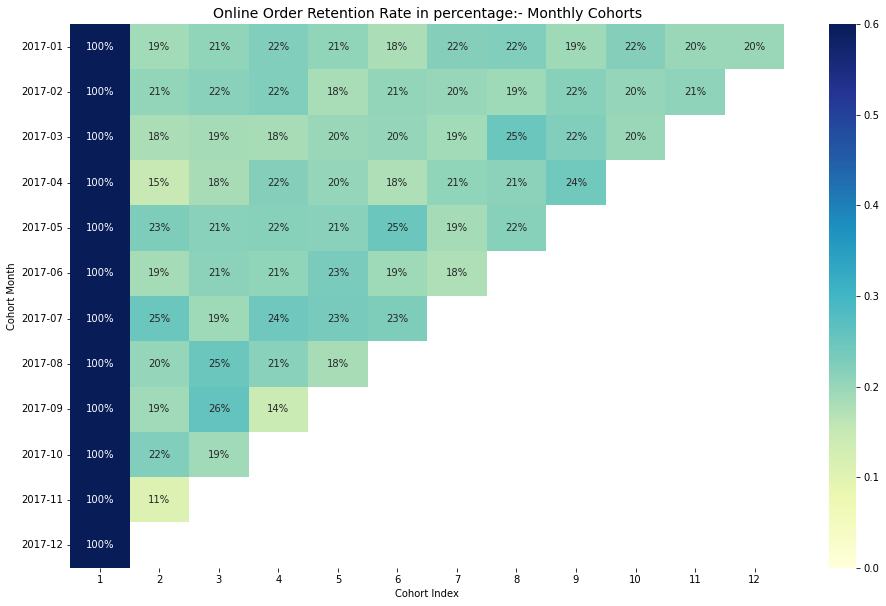

In [29]:
#retention_online.index = retention_online.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Online Order Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention_online, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

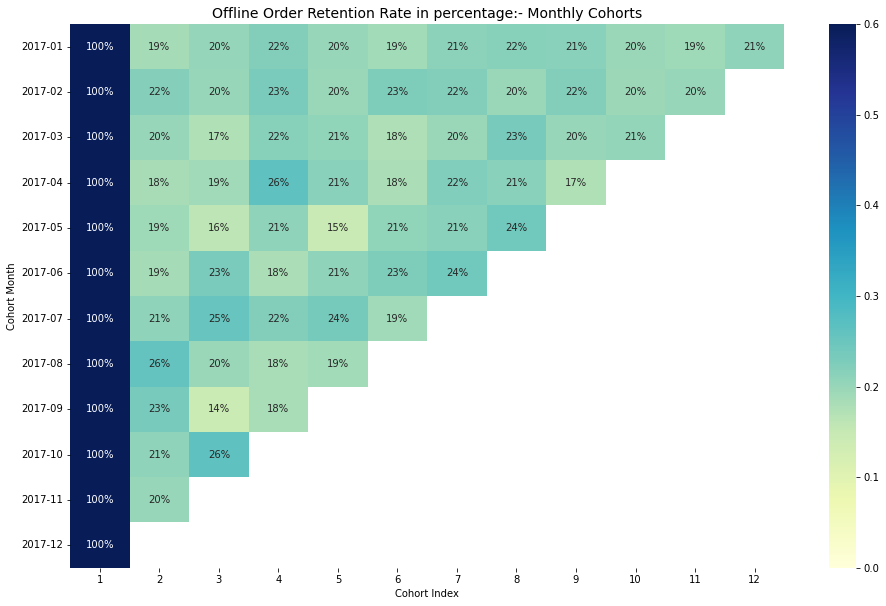

In [32]:
#retention_offline.index = retention_offline.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Offline Order Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention_offline, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()